<a href="https://colab.research.google.com/github/oariasz/Estratek_Dev/blob/main/Cacao_Anal%C3%ADtica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
from google.colab import files
## warnings.simplefilter('ignore')

df = pd.read_excel('Cacao/Chocolate Ratings v2.xlsx', sheet_name = 'Data Maria')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2530 non-null   int64  
 1   Company (Manufacturer)            2530 non-null   object 
 2   Company Location                  2530 non-null   object 
 3   Review Date                       2530 non-null   int64  
 4   Country of Bean Origin            2530 non-null   object 
 5   Specific Bean Origin or Bar Name  2530 non-null   object 
 6   Cocoa Percent                     2530 non-null   object 
 7   Characteristics                   2530 non-null   object 
 8   Rating                            2530 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 178.0+ KB


In [22]:
df.drop(['Specific Bean Origin or Bar Name', 'REF'], axis = 1, inplace = True)

In [27]:
newcol = ['company', 'location', 'year', 'origin', 'cocoa', 'type', 'rating']
df = df.rename(columns = dict(zip(df.columns, newcol)))

In [28]:
print(df.head(10))

    company location  year              origin cocoa                                     type  rating
0      5150   U.S.A.  2019            Tanzania  0.76              cacao rico, graso, empanado    3.25
1      5150   U.S.A.  2019  Dominican Republic  0.76                   cacao, vegetal, salado    3.50
2      5150   U.S.A.  2019          Madagascar  0.76               cacao, mora, cuerpo entero    3.75
3      5150   U.S.A.  2021                Fiji  0.68              masticable, apagado, gomoso    3.00
4      5150   U.S.A.  2021           Venezuela  0.72    graso, terroso, musgo, nuez, calcáreo    3.00
5      5150   U.S.A.  2021              Uganda   0.8  cacao ligeramente amargo, básico, graso    3.25
6      5150   U.S.A.  2021               India  0.68  brownie de leche, macadamia, masticable    3.50
7  A. Morin   France  2012             Bolivia   0.7                            vegetal, nuez    3.50
8  A. Morin   France  2012                Peru  0.63                 afrutado, mel

Text(0.5, 1.0, 'Ratings Distribution')

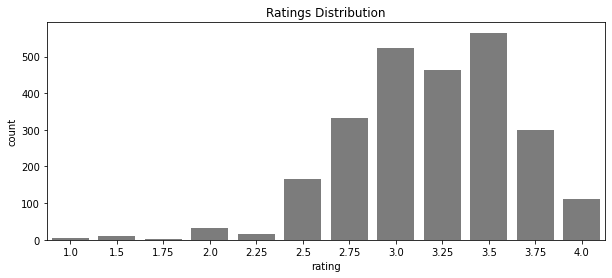

In [29]:
plt.subplots(figsize = [10, 4])
sns.countplot(df['rating'], color = '#7C7C7C')
plt.title('Ratings Distribution')

In [30]:
print(df['rating'].describe())

count    2530.000000
mean        3.196344
std         0.445321
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max         4.000000
Name: rating, dtype: float64


In [31]:
df['rating_set'] = np.where(df['rating'] >= 3.75, 1, 0)
print(df['rating_set'].value_counts())

0    2118
1     412
Name: rating_set, dtype: int64


In [32]:
print(' Porcentaje de alta calidad: ', df['rating_set'].value_counts()[1]/len(df))


 Porcentaje de alta calidad:  0.16284584980237155


In [36]:
print (df['company'].unique())

[5150 'A. Morin' 'Acalli' 'Adi aka Fijiana (Easy In Ltd)' 'Aelan'
 'Aequare (Gianduja)' 'Ah Cacao' "Akesson's (Pralus)" 'Alain Ducasse'
 'Alexandre' 'Altus aka Cao Artisan' 'Amano' 'Amatller (Simon Coll)'
 'Amazing Cacao' 'Amazona' 'Ambrosia' 'Amedei' 'AMMA' 'Anahata' 'Animas'
 'Ara' 'Arete' 'Argencove' 'Artisan du Chocolat'
 'Artisan du Chocolat (Casa Luker)' 'Aruntam' 'Askinosie' 'Atypic' 'Auro'
 'Avanaa' 'Bahen & Co.' 'Baiani' 'Bakau' 'Bankston' 'Bar Au Chocolat'
 "Baravelli's" 'Batch' 'Bean' 'Beau Cacao' 'Beehive' 'Belcolade'
 'Bellflower' 'Belvie' 'Belyzium' 'Benns' 'Benoit Nihant' 'Bernachon'
 'Beschle (Felchlin)' 'Bisou' 'Bitacora' 'amargodulce Origins' 'Bixby'
 'Black Mountain' 'Black River (A. Morin)' 'Black Sheep' 'Blanxart'
 'Blue Bandana' 'Boho' 'Bonaterra' 'Bonnat' 'Bouga Cacao (Tulicorp)'
 'Bowler Man' 'Brasstown' "Brasstown aka It's Chocolate" 'Brazen'
 'Breeze Mill' 'Bright' 'Britarev' 'Bronx Grrl Chocolate' 'Bullion'
 'Burnt Fork Bend' 'By Cacao' 'Cacai Cacao' 'Cacao 7

In [37]:
df['company'] = df.company.str.replace(r'[^(]*\(|\)[^)]*', '')
df['company'] = df['company'].str.replace('Na�ve','Naive')
df['company'] = df['company'].str.replace('[^\w\s]','')
df['company'] = df['company'].str.replace('  ','')

In [38]:
print('Total Companies:', df['company'].nunique(), '\n----------\nChocolates per Company - Top 20:')
print(df['company'].value_counts().head(20), '\n----------')
print('Median Chocolates per Company:', df.groupby('company')['company'].count().median())

Total Companies: 531 
----------
Chocolates per Company - Top 20:
Soma                    56
Felchlin                43
Bonnat                  42
Fresco                  39
Coppeneur               38
Arete                   32
Valrhona                32
A Morin                 31
Pralus                  30
Guittard                29
Dandelion               25
Domori                  23
Zotter                  21
Castronovo              19
Dick Taylor             19
Tulicorp                19
Mast Brothers           18
Duffys                  17
suave Chocolator The    17
Scharffen Berger        17
Name: company, dtype: int64 
----------
Median Chocolates per Company: 3.0


In [39]:
print('High-Quality Chocolates per Company - Top 20:')
print(df.query('rating_set == 1').groupby('company')['company'].count().sort_values(ascending = False).head(20))

High-Quality Chocolates per Company - Top 20:
company
Soma                    27
Felchlin                16
Bonnat                  15
Arete                   11
A Morin                  9
Valrhona                 9
Fresco                   9
Domori                   9
Dick Taylor              9
suave Chocolator The     8
Scharffen Berger         7
Fruition                 7
Rogue                    7
Potomac                  6
Friis Holm               6
Duffys                   6
Pierre Marcolini         6
Amano                    5
Terroir                  5
Sirene                   5
Name: company, dtype: int64


In [40]:
print('Total Company Locations:', df['location'].nunique(), '\n----------')
print (df['location'].sort_values().unique())

Total Company Locations: 67 
----------
['Amsterdam' 'Argentina' 'Australia' 'Austria' 'Belgium' 'Bolivia'
 'Brazil' 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Czech Republic'
 'Denmark' 'Dominican Republic' 'Ecuador' 'El Salvador' 'Fiji' 'Finland'
 'France' 'Germany' 'Ghana' 'Grenada' 'Guatemala' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Ireland' 'Israel' 'Italy' 'Japan' 'Lithuania'
 'Madagascar' 'Malaysia' 'Martinique' 'Mexico' 'Netherlands' 'New Zealand'
 'Nicaragua' 'Norway' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Russia' 'Sao Tome' 'Sao Tome & Principe' 'Scotland'
 'Singapore' 'South Africa' 'South Korea' 'Spain' 'St. Lucia'
 'St.Vincent-Grenadines' 'Suriname' 'Sweden' 'Switzerland' 'Taiwan'
 'Thailand' 'U.A.E.' 'U.K.' 'U.S.A.' 'Vanuatu' 'Venezuela' 'Vietnam'
 'Wales']


In [41]:
print('Company Locations - Top 20:')
print(df['location'].value_counts().head(20))

Company Locations - Top 20:
U.S.A.         1136
Canada          177
France          176
U.K.            133
Italy            78
Belgium          63
Ecuador          58
Australia        53
Switzerland      44
Germany          42
Spain            36
Venezuela        31
Japan            31
Denmark          31
Austria          30
Colombia         29
New Zealand      27
Hungary          26
Brazil           25
Peru             23
Name: location, dtype: int64


Text(0.5, 1.0, 'Boxplot: Rating by Chocolate Style')

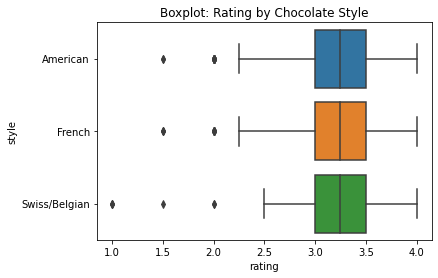

In [42]:
sty = df[['location', 'rating']]
sty = sty[sty['location'].str.contains('Switzerland|Belgium|France|Spain|Italy|U.S.A')]
dict_sty = {'Switzerland':'Swiss/Belgian', 
                  'Belgium':'Swiss/Belgian',
                  'France':'French',
                  'Spain':'French',
                  'Italy':'French',
                  'U.S.A.':'American'}
sty['style'] = sty['location'].map(dict_sty)

plt.figure(figsize = (6, 4))
p = sty[['style', 'rating']].sort_values('style', ascending = True)
sns.boxplot(x = 'rating', y = 'style', data = p)
plt.title('Boxplot: Rating by Chocolate Style')

In [51]:
paises_origen = df['origin'].sort_values().unique()
print (paises_origen)
print ('Total países de origen del cacao: ', len(paises_origen))

['(multiple)' 'Australia' 'Belize' 'Bolivia' 'Brazil' 'Burma' 'Cameroon'
 'China' 'Colombia' 'Congo' 'Costa Rica' 'Cuba' 'DR Congo'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Fiji' 'Gabon' 'Ghana'
 'Grenada' 'Guatemala' 'Haiti' 'Honduras' 'India' 'Indonesia'
 'Ivory Coast' 'Jamaica' 'Liberia' 'Madagascar' 'Malaysia' 'Martinique'
 'Mexico' 'Nicaragua' 'Nigeria' 'Panama' 'Papua New Guinea' 'Peru'
 'Philippines' 'Principe' 'Puerto Rico' 'Samoa' 'Sao Tome' 'Sierra Leone'
 'Sri Lanka' 'St. Lucia' 'Sulawesi' 'Sumatra' 'Suriname' 'Taiwan'
 'Tanzania' 'Tobago' 'Togo' 'Trinidad' 'U.S.A.' 'Vanuatu' 'Venezuela'
 'Vietnam']
Total países de origen del cacao:  57


In [52]:
df.loc[df['origin'].str.contains(',|&|and|/|-|Blend|blend|South America|West Africa', na = False), 'origin'] = '(multiple)'
df['origin'].fillna('(not specified)', inplace = True)
paises_origen = df['origin'].sort_values().unique()
print (paises_origen)
print ('Total países de origen del cacao: ', len(paises_origen))

['(multiple)' 'Australia' 'Belize' 'Bolivia' 'Brazil' 'Burma' 'Cameroon'
 'China' 'Colombia' 'Congo' 'Costa Rica' 'Cuba' 'DR Congo'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Fiji' 'Gabon' 'Ghana'
 'Grenada' 'Guatemala' 'Haiti' 'Honduras' 'India' 'Indonesia'
 'Ivory Coast' 'Jamaica' 'Liberia' 'Madagascar' 'Malaysia' 'Martinique'
 'Mexico' 'Nicaragua' 'Nigeria' 'Panama' 'Papua New Guinea' 'Peru'
 'Philippines' 'Principe' 'Puerto Rico' 'Samoa' 'Sao Tome' 'Sierra Leone'
 'Sri Lanka' 'St. Lucia' 'Sulawesi' 'Sumatra' 'Suriname' 'Taiwan'
 'Tanzania' 'Tobago' 'Togo' 'Trinidad' 'U.S.A.' 'Vanuatu' 'Venezuela'
 'Vietnam']
Total países de origen del cacao:  57


Text(0.5, 1.0, 'Company Location v. Bean Origin')

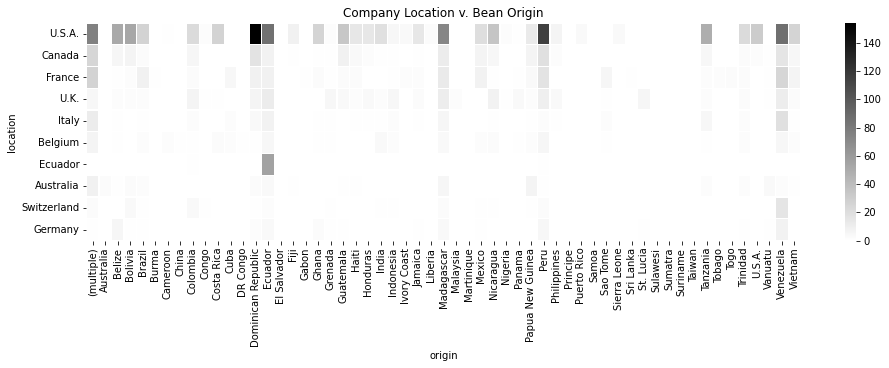

In [54]:
matrix = pd.crosstab(df['location'], df['origin'])
matrix['tot'] = matrix.sum(axis = 1)
matrix = matrix.sort_values('tot', ascending = False)
matrix = matrix.drop('tot', axis = 1)

plt.subplots(figsize = [16, 4])
sns.heatmap(matrix.head(10), linewidths = .2, cmap ='binary')
plt.title('Company Location v. Bean Origin')

In [55]:
print (df['type'].sort_values().unique())

['Easter candy, burnt' 'XL nibs, ácido, cardboard' 'acaramelado and cacao'
 ... 'ácido, terroso' 'ácido, terroso, tostado' 'áspero, cuero, terroso']


Aquí debo cambiar los tipos de cacao.  Debo chequear si la data es la misma comparando el CSV con el Excel

In [56]:
dict_type = {'Amazon':'Forastero', 
                  'Amazon mix':'Forastero',
                  'Amazon, ICS':'Forastero',
                  'Beniano':'Forastero',
                  'Blend':'blend',
                  'Blend-Forastero,Criollo':'blend',
                  'CCN51':'hybrid',
                  'Criollo':'Criollo',
                  'Criollo (Amarru)':'Criollo',
                  'Criollo (Ocumare 61)':'hybrid',
                  'Criollo (Ocumare 67)':'hybrid',
                  'Criollo (Ocumare 77)':'hybrid',
                  'Criollo (Ocumare)':'hybrid',
                  'Criollo (Porcelana)':'Criollo',
                  'Criollo (Wild)':'Criollo',
                  'Criollo, +':'Criollo',
                  'Criollo, Forastero':'blend',
                  'Criollo, Trinitario':'blend',
                  'EET':'hybrid',
                  'Forastero':'Forastero',
                  'Forastero (Amelonado)':'Forastero',
                  'Forastero (Arriba)':'Forastero',
                  'Forastero (Arriba) ASS':'Forastero',
                  'Forastero (Arriba) ASSS':'Forastero',
                  'Forastero (Catongo)':'Forastero',
                  'Forastero (Nacional)':'Forastero',
                  'Forastero (Parazinho)':'Forastero',
                  'Forastero(Arriba, CCN)':'hybrid',
                  'Forastero, Trinitario':'blend',
                  'Matina':'hybrid',
                  'Nacional':'Forastero',
                  'Nacional (Arriba)':'Forastero',
                  'Trinitario':'Trinitario',
                  'Trinitario (85% Criollo)':'blend',
                  'Trinitario (Amelonado)':'Trinitario',
                  'Trinitario (Scavina)':'Trinitario',
                  'Trinitario, Criollo':'blend',
                  'Trinitario, Forastero':'blend',
                  'Trinitario, Nacional':'blend',
                  'Trinitario, TCGA':'Trinitario',
                  'blend':'blend'}
df['varietal'] = df['type'].map(dict_type)
df['varietal'].fillna('not specified', inplace = True)

In [57]:
print('Relative Frequency of Bean Varietals:')
print(df['varietal'].value_counts(normalize = True))

Relative Frequency of Bean Varietals:
not specified    1.0
Name: varietal, dtype: float64


Text(0.5, 1.0, 'Boxplot, Rating by Bean Varietial: Known v. Not Specified')

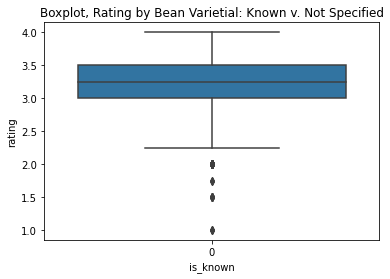

In [58]:
v = df[['varietal', 'rating']]
def describe_var(x):
    if x == 'not specified':
        return 0
    else:
        return 1
v['is_known'] = v['varietal'].apply(describe_var)

plt.figure(figsize = (6, 4))
sns.boxplot(x = 'is_known', y ='rating', data = v)
plt.title('Boxplot, Rating by Bean Varietial: Known v. Not Specified')

In [ ]:
df['cocoa'] = df['cocoa'].str.replace('%','').astype(float) / 100


In [62]:
print (df['cocoa'].sort_values().unique())

[0.605 0.715 0.725 0.735   nan]


In [63]:
print('Relative Frequency of Cocoa Percentage - Top 10:')
print(df['cocoa'].value_counts(normalize = True).head(10))

Relative Frequency of Cocoa Percentage - Top 10:
0.725    0.444444
0.735    0.222222
0.715    0.222222
0.605    0.111111
Name: cocoa, dtype: float64


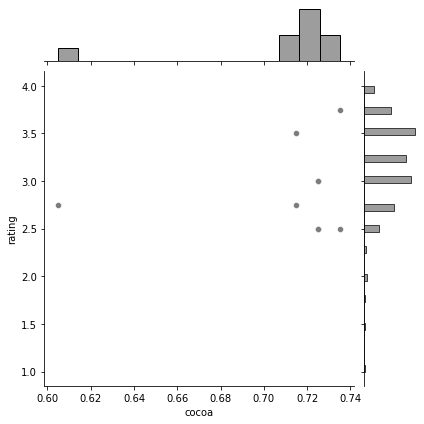

In [64]:
sns.jointplot(x = 'cocoa', y ='rating', data = df, color = '#7C7C7C')

In [65]:
print('Distribution by Year:')
print(df.groupby(['year']).size().reset_index(name = 'count'))

Distribution by Year:
    year  count
0   2006     62
1   2007     73
2   2008     92
3   2009    123
4   2010    110
5   2011    163
6   2012    194
7   2013    183
8   2014    247
9   2015    284
10  2016    217
11  2017    105
12  2018    228
13  2019    193
14  2020     81
15  2021    175


Text(0.5, 1.0, 'Distribution by Year')

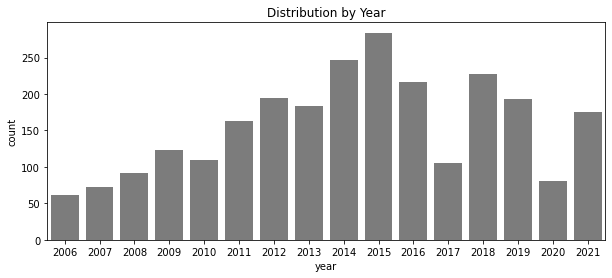

In [66]:
plt.subplots(figsize = [10, 4])
sns.countplot(df['year'], color = '#7C7C7C')
plt.title('Distribution by Year')

Text(0.5, 1.0, 'Boxplot: Rating by Year')

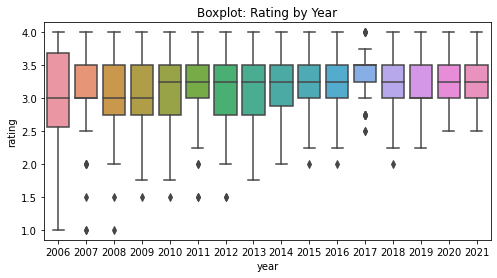

In [67]:
plt.figure(figsize = (8, 4))
p = df[['year', 'rating']].sort_values('year', ascending = True)
sns.color_palette("colorblind")
sns.boxplot(x = 'year', y = 'rating', data = p)
plt.title('Boxplot: Rating by Year')